In [2]:
!pip install tensorflow matplotlib seaborn


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize images
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 73s 0us/step


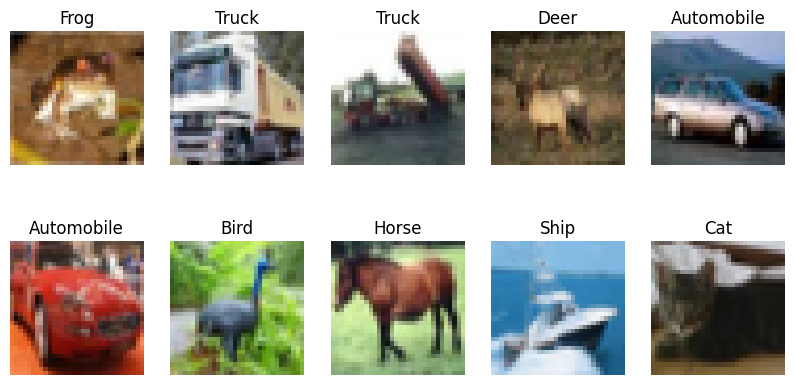

In [4]:
# Define class names
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Display sample images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(class_names[np.argmax(y_train[i])])
plt.show()

In [5]:
# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Set up TensorBoard log directory
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [8]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[tensorboard_callback]  # TensorBoard Logging
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.4051 - loss: 1.6130 - val_accuracy: 0.5149 - val_loss: 1.3235
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.5243 - loss: 1.3266 - val_accuracy: 0.5969 - val_loss: 1.1271
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 96ms/step - accuracy: 0.5861 - loss: 1.1672 - val_accuracy: 0.6202 - val_loss: 1.0751
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.6246 - loss: 1.0737 - val_accuracy: 0.6412 - val_loss: 1.0141
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.6583 - loss: 0.9780 - val_accuracy: 0.6811 - val_loss: 0.9088
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 95ms/step - accuracy: 0.6804 - loss: 0.9286 - val_accuracy: 0.6896 - val_loss: 0.8914
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.7029 - loss: 0.8568 - val_accuracy: 0.7003 - val_loss: 0.8642
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.7193 - loss: 0.8111 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

    Airplane       0.73      0.79      0.76      1000
  Automobile       0.86      0.82      0.84      1000
        Bird       0.59      0.62      0.61      1000
         Cat       0.50      0.60      0.54      1000
        Deer       0.65      0.69      0.67      1000
         Dog       0.65      0.60      0.62      1000
        Frog       0.81      0.75      0.78      1000
       Horse       0.76      0.74      0.75      1000
        Ship       0.79      0.84      0.81      1000
       Truck       0.90      0.67      0.77      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



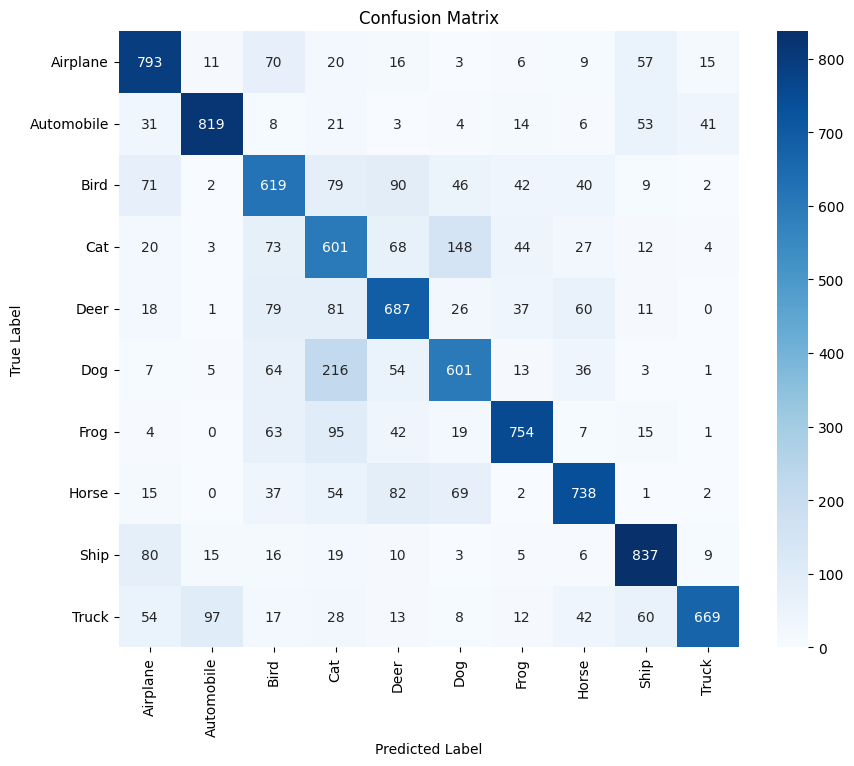

In [9]:
# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Classification Report
print(classification_report(y_test_classes, y_pred_classes, target_names=class_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [33]:
# Initialize the model by running a dummy input through it
dummy_input = np.expand_dims(X_test[0], axis=0)  # Ensure batch dimension
_ = model(dummy_input)  # This forces model initialization
print("Model has been successfully initialized.")


Model has been successfully initialized.


In [34]:
# Automatically find the last Conv2D layer
last_conv_layer = None
for layer in reversed(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer = layer.name
        break

print(f"Using last Conv2D layer: {last_conv_layer}")  # Debugging output


Using last Conv2D layer: conv2d_2


In [42]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to compute Grad-CAM
def compute_gradcam(model, img_array, class_index):
    img_array = np.expand_dims(img_array, axis=0)  # Ensure batch dimension

    # Identify the last convolutional layer dynamically
    last_conv_layer = None
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            last_conv_layer = layer.name
            break
    print(f"Using last Conv2D layer: {last_conv_layer}")  # Debugging

    # Define a model that maps input to activations of the last conv layer + final output
    grad_model = tf.keras.models.Model(
        inputs=model.input,
        outputs=[model.get_layer(last_conv_layer).output, model.output]
    )

    # Watch gradients
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_index]  # Focus on class-specific activation

    # Compute gradients
    grads = tape.gradient(loss, conv_outputs)[0]  # First dimension batch
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # Global Average Pooling
    conv_outputs = conv_outputs[0]

    # Weight each channel by importance
    for i in range(conv_outputs.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    # Compute the final Grad-CAM heatmap
    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)  # Remove negative values
    heatmap /= np.max(heatmap) if np.max(heatmap) != 0 else 1  # Normalize

    return heatmap


In [44]:
!pip install tf-keras-vis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 1.8 MB/s eta 0:00:00


In [46]:
import tensorflow.keras.backend as K
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Function to compute Grad-CAM
def compute_gradcam(img_array, model, class_index):
    img_array = np.expand_dims(img_array, axis=0)  # Ensure batch dimension

    # Ensure the model has been run before accessing activations by calling it with a dummy input if needed
    if not model._is_compiled:  # Check if model has been called before
        dummy_input = tf.zeros((1,) + model.input_shape[1:])
        _ = model(dummy_input)

    # Define a new model that maps input to activations of the last conv layer + final output
    grad_model = tf.keras.models.Model(
        inputs=model.input,
        outputs=[model.get_layer(last_conv_layer).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_index]

    # Compute the gradients
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    for i in range(conv_outputs.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) if np.max(heatmap) != 0 else 1
    return heatmap

In [47]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test)
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.7566 - loss: 0.6997 - val_accuracy: 0.7131 - val_loss: 0.8520
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 131s 92ms/step - accuracy: 0.7630 - loss: 0.6755 - val_accuracy: 0.7179 - val_loss: 0.8343
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.7736 - loss: 0.6373 - val_accuracy: 0.7268 - val_loss: 0.8253
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 93ms/step - accuracy: 0.7823 - loss: 0.6160 - val_accuracy: 0.7294 - val_loss: 0.8396
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.7907 - loss: 0.5942 - val_accuracy: 0.7253 - val_loss: 0.8432
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.8055 - loss: 0.5594 - val_accuracy: 0.7283 - val_loss: 0.8249
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 96ms/step - accuracy: 0.8151 - loss: 0.5291 - val_accuracy: 0.7272 - val_loss: 0.8568
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.8144 - loss: 0.5195 

In [48]:
!pip install tf-keras-vis


In [50]:
!pip install tf-explain


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.6 MB/s eta 0:00:00


In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tf_explain.core.integrated_gradients import IntegratedGradients

# Function to compute Integrated Gradients
def compute_integrated_gradients(model, img_array, class_index):
    explainer = IntegratedGradients()

    # Compute the attribution map
    explanation = explainer.explain(
        validation_data=(np.expand_dims(img_array, axis=0), None),
        model=model,
        class_index=class_index
    )

    return explanation


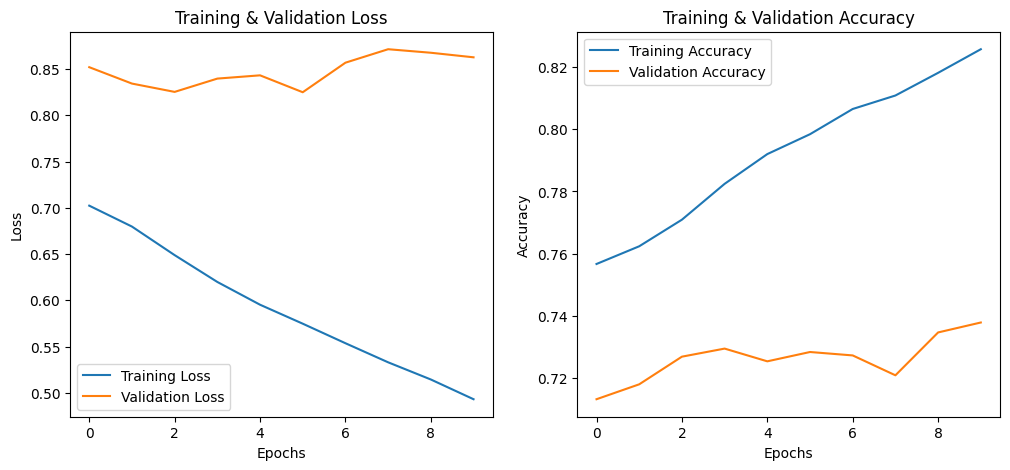

In [53]:
import matplotlib.pyplot as plt

# Extract loss and accuracy values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(len(train_loss))

# Plot Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")

# Plot Accuracy
plt.subplot(1,2,2)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


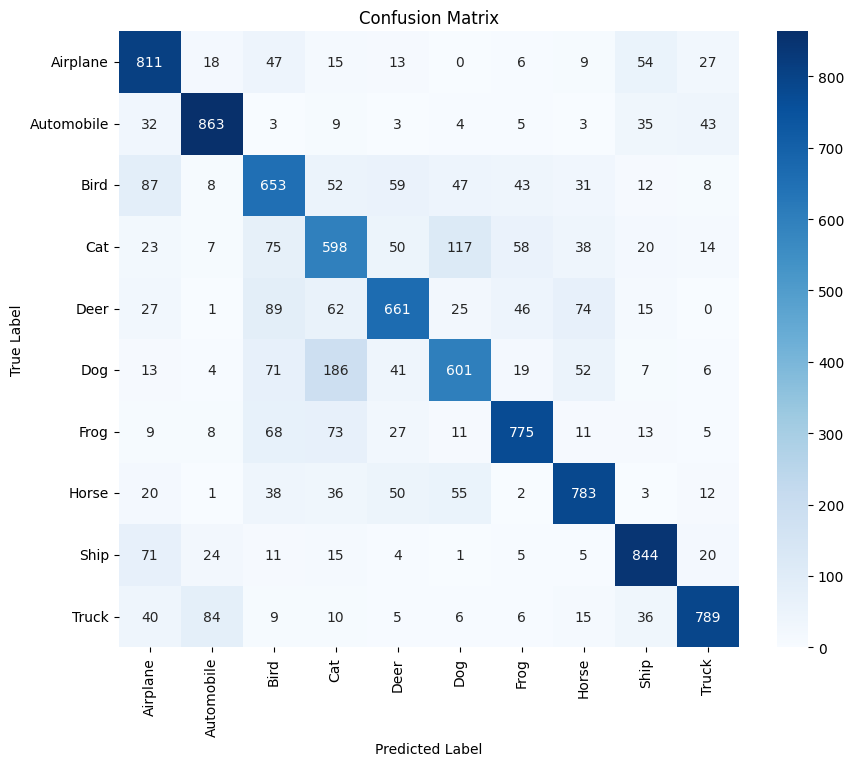

In [54]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


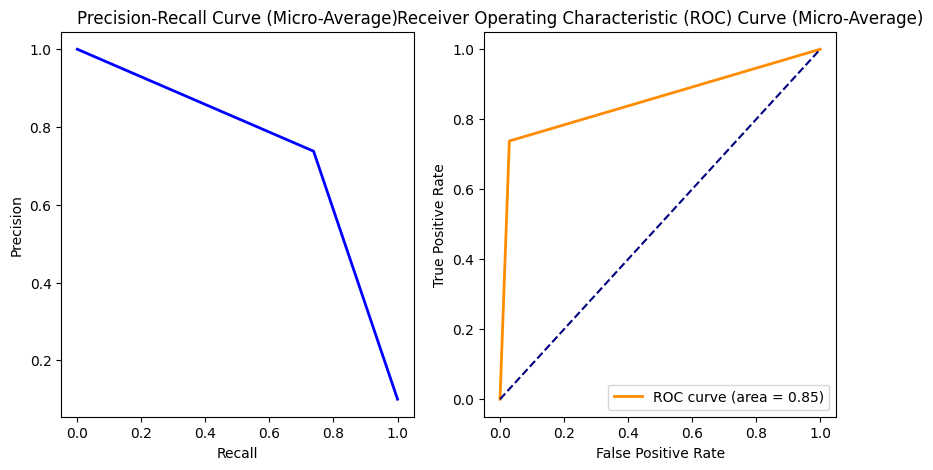

In [56]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_test_classes, classes=range(10))
y_pred_bin = label_binarize(y_pred_classes, classes=range(10))

# Compute Precision-Recall curve for micro-average
precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_pred_bin.ravel())
plt.figure(figsize=(10,5))

# Precision-Recall Curve
plt.subplot(1,2,1)
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Micro-Average)')

# Compute ROC Curve for micro-average
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

# ROC Curve
plt.subplot(1,2,2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Micro-Average)')
plt.legend(loc="lower right")

plt.show()

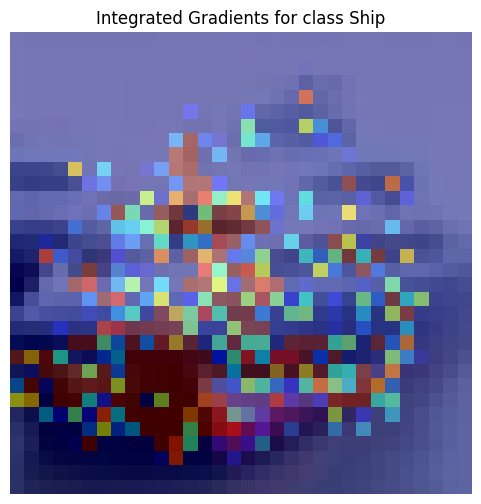

In [57]:
import tensorflow as tf
from tf_explain.core.integrated_gradients import IntegratedGradients

# Select an image from the test set
img_index = 1  # Change index to visualize different images
img = X_test[img_index]

# Compute Integrated Gradients
explainer = IntegratedGradients()
heatmap = explainer.explain((np.expand_dims(img, axis=0), None), model, np.argmax(y_test[img_index]))

# Overlay Integrated Gradients heatmap
plt.figure(figsize=(6,6))
plt.imshow(img)  # Original Image
plt.imshow(heatmap, cmap="jet", alpha=0.5)  # Overlay IG
plt.axis("off")
plt.title(f"Integrated Gradients for class {class_names[np.argmax(y_test[img_index])]}")
plt.show()
